# Flashcard Creation

In [6]:
import json
import os

def create_flashcards(num_cards: int) -> dict:
    """
    function that takes one integer paremeter, num_cards, and asks the user to
    create flashcards by providing words with less than or equal to 20 characters
    and its corresponding definition, and returns everything as a dictionary

    Args:
        num_cards:          number of flashcards the user wished to make

    Returns:
        all_cards:          a dictionary created by the user where each item is
                            a flashcard: the key is the vocab less than 20
                            characters, and the value is the definition

    Examples:
        >>> create_flashcards():
            How many flashcards would you like to create today? 3
            Word 1: apple
                Word 1's definition: red
            Word 2: banana
                Word 2's definition: yellow
            Word 3: grape
                Word 3's definition: purple
            {'apple': red, 'banana': yellow, 'graphe': yellow}
    """
    new_cards = {}
    fname = "created_flashcards.json"

    # if file exists and have content: load all data to all_cards
    if os.path.exists(fname) == True and os.path.getsize(fname) > 0:
        with open(fname, "r") as file:
            all_cards = json.load(file)

    # if file doesn't exist or have no content just initialize empty all_cards
    else:
        all_cards = {}

    # creating the cards
    if num_cards < 0:
        print("Invalid Input!")
        return {}

    elif num_cards == 0:
        return all_cards

    else:
        for i in range(int(num_cards)):

            # i + 1 as indexing starts at 0 but daily counting start at 1
            vocab = input(f'Word {i+1}: ').title()
            definition = input(f"   Word {i+1}'s definition: ").title()
            new_cards[vocab] = definition

        all_cards.update(new_cards)

        # create or update the file depending on whether it previously existed
        with open(fname, "w") as file:
            json.dump(all_cards, file, indent=4)

        return all_cards

In [ ]:
# TEST CASES

# when input = 0
assert create_flashcards(0) == {}

# when input = -1:
assert create_flashcards(-1) == {}

# Starting from scratch: when input = 2, and user enters word1 as "apple" and
# definition 1 as "red" and word2 as "banana" and definition 2 as "yellow"
assert create_flashcards(2) == {'Apple': 'Red', 'Banana': 'Yellow'}

# Building: user creates another card on top of previous two cards called
# "grape" and provided definition as "purple"
assert create_flashcards(1) == {'Apple': 'Red', 'Banana': 'Yellow', "Grape": "Purple"}

Invalid Input!
Word 1: apple
   Word 1's definition: red
Word 2: banana
   Word 2's definition: yellow
Word 1: grape
   Word 1's definition: purple


# Displaying the Flashcards

In [ ]:
def display_flashcards(word: str) -> None:
    """
    Function that accepts a single string parameter, word, and prints a
    22 "-" by 5 "-" flashcard with that word in the center

    Args:
        word:           one word from flashcards created by the user

    Returns:
        None

    Examples:
        >>> display_fashcards("apple")
            ----------------------
            -                    -
            -       apple        -
            -                    -
            ----------------------
    """
    border = '-' * 22
    empty = f'-{" " * 20}-'
    word_line = f'-{word.center(20)}-'

    print(border)
    print(empty)
    print(word_line)
    print(empty)
    print(border)

In [ ]:
# TEST CASES

# Regular word
display_flashcards("osteoblast")

# Longest possible word with 20 characters
display_flashcards("01234567890123456789")

# Word that is too long
display_flashcards("this is tooooooooooooo long")

# Empty card
display_flashcards("")

----------------------
-                    -
-     osteoblast     -
-                    -
----------------------
----------------------
-                    -
-01234567890123456789-
-                    -
----------------------
----------------------
-                    -
-this is tooooooooooooo long-
-                    -
----------------------
----------------------
-                    -
-                    -
-                    -
----------------------


There is no formal test cases with assert statements for display_flashcards because I'm printing and not returning. However, from the printed statements above we can see that the longest word length it can take is 20. Anything longer than that will be considered as invalid.


# Practice Flashcards

In [10]:
import random
import time
from IPython.display import HTML, display

def practice(flashcards: dict) -> dict:
    """
    function that accepts a dictionary, flashcards, representing the cards
    created by the user, and creates randomized prompts quizzing the user and
    returns a dictionary containing specific data

    If the user answers correctly:      green "correct" message will be displayed

    If the user answers incorrectly:    red "Incorrect" message will be displayed
                                        and the flashcard will be returned back
                                        into the study deck. This process will
                                        continue until the user answers correctly

    Args:
        flashcards:         a dictionary of flashcards where keys are the
                            vocab, and values are the definitions

    Returns:
        progress:           a dictionary with string vocab keys and list values
                            containing the number of tries and the total time
                            they took before giving the correct definition


    Examples:
        >>> practice({'Apple': 'Red', 'Banana': 'Yellow', 'Grape': 'Purple'})
            Define Apple: red
            Correct
            Define Banana: yellow
            correct
             Define Grape: green
            Incorrect
            Define Grape: purple
            Correct
            {'Apple': [1, 2.554],
             'Banana': [1, 2.286],
             'Grape': [2, 12.589]}
    """
    progress = {}

    vocabs = list(flashcards.keys())

    # creating the base case for each vocab
    for vocab in vocabs:
        progress[vocab] = [0, 0]

    while vocabs:
        # -1 to avoid looping out of range because randint is inclusive
        index = random.randint(0, len(vocabs)-1)
        word = vocabs.pop(index)

        display_flashcards(word)

        start = time.time()

        answer = input().title()

        if answer == flashcards[word]:
            display(HTML(f"<h4 style='color: #00ff2a;'>Correct! </h4>"))
        else:
            display(HTML(f"<h4 style='color: #ff1919;'>Wrong! </h4>"))
            vocabs.append(word)

        end = time.time()

        progress[word][0] += 1
        progress[word][1] += round((end-start), 3)

    return progress

In [ ]:
practice({'Apple': 'Red', 'Banana': 'Yellow', 'Grape': 'Purple'})

----------------------
-                    -
-       Apple        -
-                    -
----------------------
red


----------------------
-                    -
-       Banana       -
-                    -
----------------------
yellow


----------------------
-                    -
-       Grape        -
-                    -
----------------------
green


----------------------
-                    -
-       Grape        -
-                    -
----------------------
purple


{'Apple': [1, 2.554], 'Banana': [1, 2.286], 'Grape': [2, 12.589]}

Since all of my previous methods have been tested, I won't be testing this with assert statements as time will be very hard to control. Instead, I will test this function by visually verifying the desired behavior of this function. In the example above, my vocab words were "apple," "banana," and "grape." When I tested my knowledge, I got "apple" and "banana" correct on the first try and "grape" correct in two tries. The returned dictionary satisfies that as the first element in its values in each word matched my tries. In addition, my time spent, shown as the second element of the keys in the returned list, also matches my performance, showing that "grape" took significantly longer to answer correctly than "apple" and "banana."

# Progress Visualization

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def progress_visualization(progress: dict) -> None:
    """
    Function that accepts a single dictionary parameter, progress, and generates
    different types of graphs helping the user find their weakspots in knowledge

    Args:
        progress:           dictionary that have keys that keeps tracks of the
                            words involved in the flashcards and values that
                            keeps tracks of the number of times the user took
                            before providing the correct definition

    Returns:
        None
    """
    print('"Attempts" graphs the word & attempts used before perfection')
    print('"Times" graphs the word & time spent on each word\n')
    choice = input(f'Which progress graph would you like to see? (Attempt or Time): \n')

    vocabs = list(progress.keys())
    bar_colors = []
    attempts = []
    times = []

    # importing data
    for val in list(progress.values()):
        attempts.append(val[0])
        times.append(val[1])

    plt.figure(figsize=(10, 4))

    if choice.title() == "Attempt":
        # show different color based on number of attempts
        for attempt in attempts:
            if attempt >= 3:
                bar_colors.append("salmon")
            else:
                bar_colors.append("palegreen")

        plt.bar(vocabs, attempts, color=bar_colors)
        plt.title('Flashcards vs. Attemps Before Mastery Today')
        plt.xlabel('Flashcards')
        plt.ylabel('Attempts Before Mastery Today')

    elif choice.title() == "Time":
        # show different color based on time spent
        for time in times:
            if time >= 15:
                bar_colors.append("salmon")
            else:
                bar_colors.append("palegreen")

        plt.bar(vocabs, times, color=bar_colors)
        plt.title('Time Took to Master Each Flashcard Today (green = mastered; red = need more effort)')
        plt.xlabel('Flashcards')
        plt.ylabel('Time Took Till Mastery Today')

    else:
        print("\nInvalid Direction!")

    # create a common legend:
    mapping_colors = [Patch(facecolor="salmon", label="Needs Practice"),
                      Patch(facecolor="palegreen", label="Mastery")]
    plt.legend(handles=mapping_colors, title='Legend', loc='upper left')

    plt.show()

"Attempts" graphs the word & attempts used before perfection
"Times" graphs the word & time spent on each word

Which progress graph would you like to see? (Attempts or Time): 
N/A

Invalid Direction!


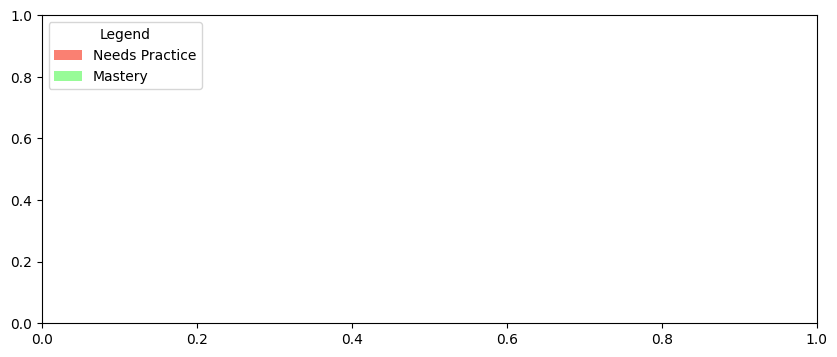

In [ ]:
progress_visualization({'apple':[1, 10], 'banana': [5, 30], 'citris': [1, 5], 'dragonfruit': [10, 100]})

"Attempts" graphs the word & attempts used before perfection
"Times" graphs the word & time spent on each word

Which progress graph would you like to see? (Attempts or Time): 
attempts


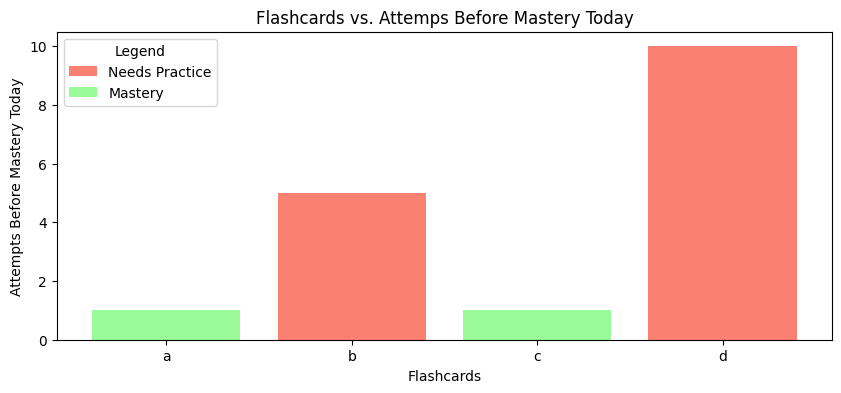

In [ ]:
progress_visualization({'a':[1, 10], 'b': [5, 30], 'c': [1, 5], 'd': [10, 100]})

"Attempts" graphs the word & attempts used before perfection
"Times" graphs the word & time spent on each word

Which progress graph would you like to see? (Attempts or Time): 
time


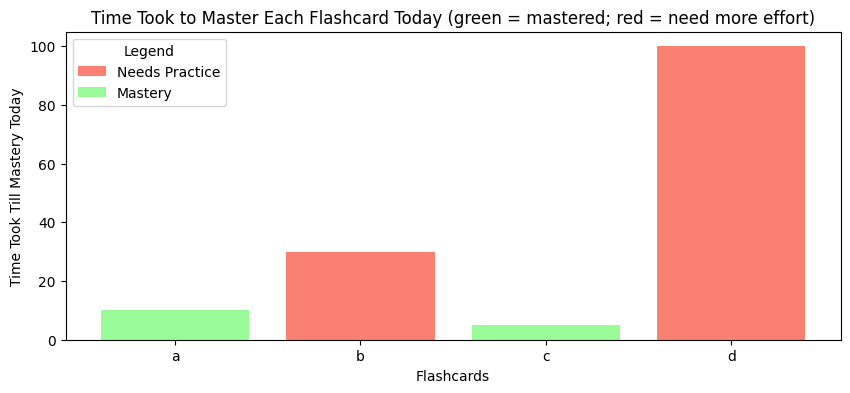

In [ ]:
progress_visualization({'a':[1, 10], 'b': [5, 30], 'c': [1, 5], 'd': [10, 100]})

Once again, I don't have test cases for this because I'm just printing the graphs and not returning anything. However, the previous 3 printed graphs show that my function works, as the first one prints nothing when the user input is neither "attempt" nor "time"; the second prints the "attempt" graph, and the third prints the "time" graphs according to different user inputs. Bars will appear green if the user provides the correct answer before the 3rd try or spends less than 15 seconds trying to remember the word; Bars will appear red if the user provides the correct answer after the 3rd try or spends more than 15 seconds trying to remember the word.

# Main Function

In [11]:
from IPython.display import HTML, display
def main():
    """
    Function simulates a flashcard app that allows users to customize their
    flashcards, practice, see their progress, and keep track of their progress.

    Definitions must be entered word per word as it is case sensitive.

    Everything else should be case insensitive.

    Args:
        None

    Returns:
        None
    """
    display(HTML(f"<h2 style='color: #0033CC;'>Flashcard Creation </h2>"))

    starting_point = input("would you like to start from scratch or build off of yesterday's work(scratch / build)?\n")
    num_cards = input("How many flashcards would you like to create today?\n")

    fname = "created_flashcards.json"

    if starting_point == "scratch":
        with open(fname, "w") as file:
            json.dump({}, file)

    flashcards = create_flashcards(int(num_cards))

    display(HTML(f"<h2 style='color: #0033CC;'>Practice Time! </h2>"))
    progress = practice(flashcards)

    display(HTML(f"<h2 style='color: #0033CC;'>Progress Visualization! </h2>"))
    plotting_progress = progress_visualization(progress)

    display(HTML(f"<h2 style='color: black'>🎉💯🌈WELLDONE!✨🥳🍀</h2>"))
    display(HTML(f"<h2 style='color: black'>🧦🎁🎅Merry Christmas Everyone & Have a Fabulous Winter Break!🎄🔔⛄</h2>"))

would you like to start from scratch or build off of yesterday's work(scratch / build)?
build
How many flashcards would you like to create today?
1
Word 1: osteoclast
   Word 1's definition: destroys bone cells


----------------------
-                    -
-  Osteoprogenitor   -
-                    -
----------------------
stem cells


----------------------
-                    -
-     Osteoclast     -
-                    -
----------------------
adadk;


----------------------
-                    -
-     Osteoblast     -
-                    -
----------------------
a;lskd


----------------------
-                    -
-     Osteoclast     -
-                    -
----------------------
destroys bone cells


----------------------
-                    -
-     Osteoblast     -
-                    -
----------------------
Bone Matrix Making Cells


"Attempts" graphs the word & attempts used before perfection
"Times" graphs the word & time spent on each word

Which progress graph would you like to see? (Attempt or Time): 
time


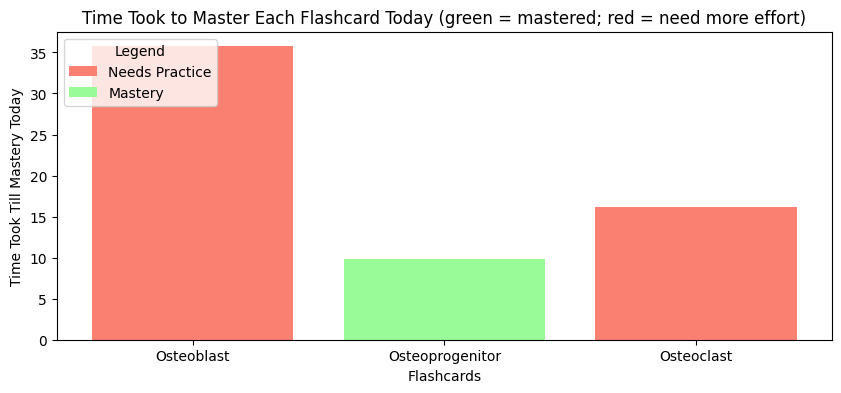

In [9]:
main()